In [102]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import glob
import csv
import tarfile
from tqdm import tqdm
import json

In [2]:
londonDf = pd.read_csv('../BL_Work/London postcodes.csv')

In [3]:
pdp = pd.read_csv('../BL_Work/openPrescribe/serialized/201012.gz',compression='gzip')

In [4]:
pdp['10']= pdp['10'].str.split(' ', n = 1, expand = True)

In [5]:
pdp.head(n=100)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,Q30,5D7,A86001,1302020D0BBAAAC,Conotrane_Crm,1.0,1.76,1.65,200.0,201012.0,NE6,NaN,NaN,NaN,NaN
1,1,Q30,5D7,A86001,1310020H0AAABAB,Clotrimazole_Crm 1%,1.0,1.52,1.43,20.0,201012.0,NE6,NaN,NaN,NaN,NaN
2,2,Q30,5D7,A86003,0101010G0AAABAB,Co-Magaldrox_Susp 195mg/220mg/5ml S/F,33.0,86.02,80.28,18520.0,201012.0,NE1,NaN,NaN,NaN,NaN
3,3,Q30,5D7,A86003,0101010R0AAABAB,Simeticone_Susp 40mg/ml S/F,3.0,7.35,6.87,150.0,201012.0,NE1,NaN,NaN,NaN,NaN
4,4,Q30,5D7,A86003,0101010R0BCAAAB,Infacol_Susp 40mg/ml S/F,3.0,9.80,9.12,200.0,201012.0,NE1,NaN,NaN,NaN,NaN
5,5,Q30,5D7,A86003,0101021B0AAAJAJ,Gppe Pdr Sach_Gaviscon Infant (2 D Dual),5.0,38.38,35.50,234.0,201012.0,NE1,NaN,NaN,NaN,NaN
6,6,Q30,5D7,A86003,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp (Aniseed) S/F,4.0,14.33,13.33,1400.0,201012.0,NE1,NaN,NaN,NaN,NaN
7,7,Q30,5D7,A86003,0101021B0BCAAAC,Gastrocote_Tab,9.0,50.90,47.16,1450.0,201012.0,NE1,NaN,NaN,NaN,NaN
8,8,Q30,5D7,A86003,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1.0,5.24,4.86,500.0,201012.0,NE1,NaN,NaN,NaN,NaN
9,9,Q30,5D7,A86003,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,6.0,17.22,16.05,105.0,201012.0,NE1,NaN,NaN,NaN,NaN


In [6]:
# londonDf['Population'].head(n=10)

In [7]:
depression_df = pdp[pdp['12'] == 'depression']

In [8]:
len(depression_df)

283599

In [9]:
londonDf.groupby('District').groups

{'Barking and Dagenham': Int64Index([ 94708,  94710,  94711,  94712,  94713,  94715,  94716,  94717,
              94718,  94719,
             ...
             172163, 172164, 172165, 172166, 172167, 172168, 172169, 172170,
             172171, 172172],
            dtype='int64', length=4476),
 'Barnet': Int64Index([ 72877,  72897,  72898,  72904,  72972,  72988,  73001,  73002,
              73006,  73008,
             ...
             161161, 161162, 161163, 161164, 161166, 161167, 161168, 161169,
             320424, 320425],
            dtype='int64', length=15831),
 'Bexley': Int64Index([ 22270,  22271,  22272,  22273,  22274,  22275,  22276,  22277,
              22278,  22279,
             ...
             204690, 204691, 204692, 204693, 204694, 204700, 204703, 204706,
             204708, 204712],
            dtype='int64', length=6340),
 'Brent': Int64Index([ 75502,  75503,  75504,  75505,  75506,  75507,  75508,  75509,
              75511,  75512,
             ...
          

In [10]:
boroughDict = {}
for name, group in londonDf.groupby('District'):
    boroughDict[name] = list(set(group['Postcode district']))

In [11]:
boroughDict

{'Barking and Dagenham': ['RM1',
  'RM6',
  'RM7',
  'RM5',
  'RM8',
  'RM9',
  'RM10',
  'RM12',
  'IG11'],
 'Barnet': ['N12',
  'NW4',
  'N10',
  'N11',
  'NW2',
  'N14',
  'NW11',
  'WD6',
  'N3',
  'NW3',
  'NW6',
  'NW9',
  'HA8',
  'NW7',
  'EN4',
  'EN5',
  'EN6',
  'N2',
  'N20',
  'N6',
  'HA7'],
 'Bexley': ['SE9',
  'SE2',
  'DA5',
  'DA7',
  'DA6',
  'SE28',
  'DA16',
  'DA17',
  'DA14',
  'DA15',
  'DA1',
  'DA8',
  'DA18'],
 'Brent': ['N8',
  'NW6',
  'NW2',
  'NW10',
  'NW8',
  'NW9',
  'W10',
  'HA8',
  'HA9',
  'UB6',
  'HA0',
  'HA1',
  'HA3',
  'NW26',
  'W9',
  'HA7'],
 'Bromley': ['SE26',
  'CR3',
  'CR0',
  'CR6',
  'TN14',
  'SE20',
  'BR8',
  'BR7',
  'BR6',
  'BR5',
  'BR4',
  'BR3',
  'BR2',
  'BR1',
  'SE19',
  'DA14',
  'TN16',
  'SE9',
  'SE12'],
 'Camden': ['NW1W',
  'W1T',
  'W1P',
  'N1C',
  'W1A',
  'WC2E',
  'WC2A',
  'WC2B',
  'WC2N',
  'WC2H',
  'EC4A',
  'WC2R',
  'NW26',
  'WC1X',
  'NW5',
  'NW6',
  'NW1',
  'NW2',
  'NW3',
  'NW8',
  'CM23',
  'N1

In [12]:

def countDiseasePrescriptions(boroughDict,diseasedPriscriptions):
    diseasePrescriptionCount = {}
    for k in boroughDict:
        if k not in diseasePrescriptionCount:
            diseasePrescriptionCount[k] = 0
            areas = boroughDict[k]
            area_disease = diseasedPriscriptions[diseasedPriscriptions['10'].isin(areas)]
            diseasePrescriptionCount[k] = len(area_disease)
    return diseasePrescriptionCount


def countAllPrescriptions(boroughDict,allPriscriptions):
    allPrescriptionCount = {}
    for k in boroughDict:
        if k not in allPrescriptionCount:
            allPrescriptionCount[k] = 0
            areas = boroughDict[k]
            all_disease = allPriscriptions[allPriscriptions['10'].isin(areas)]
            allPrescriptionCount[k] = len(all_disease)
    return allPrescriptionCount
        
        
            

In [13]:
depression_prescriptionCount_london = countDiseasePrescriptions(boroughDict,depression_df)

In [14]:
depression_prescriptionCount_london

{'Barking and Dagenham': 1816,
 'Barnet': 3797,
 'Bexley': 1621,
 'Brent': 4144,
 'Bromley': 3525,
 'Camden': 3332,
 'City of London': 440,
 'Croydon': 2936,
 'Ealing': 4714,
 'Enfield': 3394,
 'Greenwich': 2196,
 'Hackney': 3051,
 'Hammersmith and Fulham': 2931,
 'Haringey': 2094,
 'Harrow': 2656,
 'Havering': 2016,
 'Hillingdon': 3462,
 'Hounslow': 3227,
 'Islington': 3230,
 'Kensington and Chelsea': 2957,
 'Kingston upon Thames': 1631,
 'Lambeth': 3050,
 'Lewisham': 2908,
 'Merton': 2353,
 'Newham': 2741,
 'Redbridge': 3075,
 'Richmond upon Thames': 2415,
 'Southwark': 2296,
 'Sutton': 2842,
 'Tower Hamlets': 2488,
 'Waltham Forest': 2833,
 'Wandsworth': 2987,
 'Westminster': 3749}

In [15]:
%store depression_prescriptionCount_london

Stored 'depression_prescriptionCount_london' (dict)


In [16]:
all_prescription_counts = countAllPrescriptions(boroughDict,pdp)

In [17]:
all_prescription_counts

{'Barking and Dagenham': 67023,
 'Barnet': 137683,
 'Bexley': 64098,
 'Brent': 145845,
 'Bromley': 124442,
 'Camden': 111528,
 'City of London': 14296,
 'Croydon': 105530,
 'Ealing': 162988,
 'Enfield': 124447,
 'Greenwich': 83869,
 'Hackney': 103437,
 'Hammersmith and Fulham': 96235,
 'Haringey': 73127,
 'Harrow': 98333,
 'Havering': 75592,
 'Hillingdon': 127774,
 'Hounslow': 110002,
 'Islington': 108195,
 'Kensington and Chelsea': 99374,
 'Kingston upon Thames': 57002,
 'Lambeth': 107947,
 'Lewisham': 104719,
 'Merton': 86959,
 'Newham': 96041,
 'Redbridge': 111873,
 'Richmond upon Thames': 81278,
 'Southwark': 84451,
 'Sutton': 102317,
 'Tower Hamlets': 84192,
 'Waltham Forest': 103006,
 'Wandsworth': 107101,
 'Westminster': 122852}

In [18]:
%store all_prescription_counts

Stored 'all_prescription_counts' (dict)


In [19]:
london_mental_gt = pd.read_csv('../BL_Work/mental-health-common-problems-borough.csv')

In [20]:
londonDf.columns

Index([u'Postcode', u'In Use?', u'Latitude', u'Longitude', u'Easting',
       u'Northing', u'Grid Ref', u'County', u'District', u'Ward',
       u'District Code', u'Ward Code', u'Country', u'County Code',
       u'Constituency', u'Introduced', u'Terminated', u'Parish',
       u'National Park', u'Population', u'Households', u'Built up area',
       u'Built up sub-division', u'Lower layer super output area',
       u'Rural/urban', u'Region', u'Altitude', u'London zone', u'LSOA Code',
       u'Local authority', u'MSOA Code', u'Middle layer super output area',
       u'Parish Code', u'Census output area', u'Constituency Code',
       u'Index of Multiple Deprivation', u'Quality', u'User Type',
       u'Last updated', u'Nearest station', u'Distance to station',
       u'Postcode area', u'Postcode district', u'Police force'],
      dtype='object')

In [21]:
pop = pd.read_csv('../BL_Work/census-historic-population-borough.csv')

In [22]:
pop.head()

,Area Code,Area Name,Persons-1801,Persons-1811,Persons-1821,Persons-1831,Persons-1841,Persons-1851,Persons-1861,Persons-1871,...,Persons-1921,Persons-1931,Persons-1939,Persons-1951,Persons-1961,Persons-1971,Persons-1981,Persons-1991,Persons-2001,Persons-2011
0,00AA,City of London,129000,121000,125000,123000,124000,128000,112000,75000,...,14000,11000,9000,5000,4767,4000,5864,4230,7181,7375
1,00AB,Barking and Dagenham,3000,4000,5000,6000,7000,8000,8000,10000,...,44000,138000,184000,189000,177092,161000,149786,140728,163944,185911
2,00AC,Barnet,8000,9000,11000,13000,14000,15000,20000,29000,...,147000,231000,296000,320000,318373,307000,293436,284106,314565,356386
3,00AD,Bexley,5000,6000,7000,9000,11000,12000,15000,22000,...,76000,95000,179000,205000,209893,217000,215233,211404,218301,231997
4,00AE,Brent,2000,2000,3000,3000,5000,5000,6000,19000,...,184000,251000,310000,311000,295893,281000,253275,227903,263466,311215


In [63]:
population_dict = {}
for index, row in pop.iterrows():
    population_dict[row['Area Name']] = row['Persons-2001']

In [64]:
population_dict

{'Barking and Dagenham': 163944,
 'Barnet': 314565,
 'Bexley': 218301,
 'Brent': 263466,
 'Bromley': 295535,
 'Camden': 198022,
 'City of London': 7181,
 'Croydon': 330584,
 'Ealing': 300943,
 'Enfield': 273565,
 'Greater London': 7172057,
 'Greenwich': 214402,
 'Hackney': 202825,
 'Hammersmith and Fulham': 165238,
 'Haringey': 216505,
 'Harrow': 206822,
 'Havering': 224262,
 'Hillingdon': 243006,
 'Hounslow': 212352,
 'Inner London': 2766065,
 'Islington': 175789,
 'Kensington and Chelsea': 158921,
 'Kingston upon Thames': 147271,
 'Lambeth': 266170,
 'Lewisham': 248917,
 'Merton': 187919,
 'Newham': 243884,
 'Outer London': 4405992,
 'Redbridge': 238623,
 'Richmond upon Thames': 172330,
 'Southwark': 244867,
 'Sutton': 179767,
 'Tower Hamlets': 196083,
 'Waltham Forest': 218335,
 'Wandsworth': 260379,
 'Westminster': 181284}

In [65]:
london_mental_gt.head()

,Code,Area,Any neurotic disorder-Rates per 1000 population,All phobias-Rates per 1000 population,Depressive episode-Rates per 1000 population,Generalised anxiety disorder-Rates per 1000 population,Mixed anxiety depression-Rates per 1000 population,Obsessive compulsive disorder-Rates per 1000 population,Panic disorder-Rates per 1000 population,Any neurotic disorder-Estimated cases,All phobias-Estimated cases,Depressive episode-Estimated cases,Generalised anxiety disorder-Estimated cases,Mixed anxiety depression-Estimated cases,Obsessive compulsive disorder-Estimated cases,Panic disorder-Estimated cases,Population 16-74
0,00AA,City of London,190.6,22.0,39.5,60.4,84.4,15.9,9.4,1240.3,143.4,257.2,393.3,549.6,103.7,61.0,6508
1,00AB,Barking and Dagenham,177.5,21.3,34.4,51.1,82.6,15.2,8.2,20417.0,2450.1,3958.1,5882.8,9502.0,1750.0,942.0,115021
2,00AC,Barnet,167.4,20.0,32.5,49.0,77.4,14.1,7.9,39761.3,4744.7,7717.8,11644.0,18395.2,3348.4,1867.9,237591
3,00AD,Bexley,155.6,18.5,30.4,45.9,71.7,13.0,7.3,24735.1,2933.5,4836.1,7292.0,11402.7,2072.8,1158.6,158936
4,00AE,Brent,182.3,21.8,35.2,53.0,84.4,15.5,8.5,37682.8,4497.2,7273.9,10952.5,17452.7,3205.2,1751.6,206668


In [66]:
prevalenceDict = {}
for k in all_prescription_counts:
    prevalenceDict[k] = {}
    prevalenceDict[k]['presc'] = float(depression_prescriptionCount_london[k])/float(all_prescription_counts[k])
    prevalenceDict[k]['pop'] = float(depression_prescriptionCount_london[k])/float(population_dict[k])
    prevalenceDict[k]['norm'] = float(depression_prescriptionCount_london[k])/(float(population_dict[k])*float(all_prescription_counts[k]))
    

In [67]:
gt_dict = {}
pop2006 = {}
cases2006 = {}
for index,row in london_mental_gt.iterrows():
    gt_dict[row['Area']] = float(row['Mixed anxiety depression-Estimated cases'])/float(row['Population 16-74'])
    pop2006[row['Area']] = float(row['Population 16-74'])
    cases2006[row['Area']] = float(row['Mixed anxiety depression-Estimated cases'])

In [68]:
gt_dict

{'Barking and Dagenham': 0.08261100146929691,
 'Barnet': 0.07742380814088076,
 'Bexley': 0.0717439724165702,
 'Brent': 0.08444800356126735,
 'Bromley': 0.07236955063400995,
 'Camden': 0.09697017427404565,
 'City of London': 0.0844499078057775,
 'Croydon': 0.07945024308007559,
 'Ealing': 0.08004385114732349,
 'East': 0.09896997456782401,
 'East Midlands': 0.07286065582820828,
 'Enfield': 0.07869107135079152,
 'England': 0.08914960868538728,
 'Greenwich': 0.08831885469779831,
 'Hackney': 0.09963933780055184,
 'Hammersmith and Fulham': 0.09594590595685498,
 'Haringey': 0.09300267424855946,
 'Harrow': 0.07079168307274136,
 'Havering': 0.0695392418120863,
 'Hillingdon': 0.07410571689093973,
 'Hounslow': 0.07764821699359194,
 'Islington': 0.0999732634985055,
 'Kensington and Chelsea': 0.09038899286762102,
 'Kingston upon Thames': 0.07557556780443202,
 'Lambeth': 0.0968044299736198,
 'Lewisham': 0.09141419172193242,
 'London': 0.08435184459851719,
 'Merton': 0.07894883071647839,
 'Newham': 0.

In [103]:
lon_boro = gt_dict.keys()

In [105]:
%store lon_boro

Stored 'lon_boro' (list)


In [69]:
prevalenceDict

{'Barking and Dagenham': {'norm': 1.652709235029559e-07,
  'pop': 0.011076953105938613,
  'presc': 0.027095176282768602},
 'Barnet': {'norm': 8.766977207926553e-08,
  'pop': 0.012070637229189515,
  'presc': 0.02757784185411416},
 'Bexley': {'norm': 1.1584647163926458e-07,
  'pop': 0.007425527139133582,
  'presc': 0.025289400605323097},
 'Brent': {'norm': 1.0784589625169035e-07,
  'pop': 0.01572878473882778,
  'presc': 0.028413726901847854},
 'Bromley': {'norm': 9.58480358317601e-08,
  'pop': 0.011927521274975891,
  'presc': 0.028326449269539224},
 'Camden': {'norm': 1.5087164861571248e-07,
  'pop': 0.01682641322681318,
  'presc': 0.02987590560218062},
 'City of London': {'norm': 4.286010298737256e-06,
  'pop': 0.061272803230747803,
  'presc': 0.03077783995523223},
 'Croydon': {'norm': 8.415855748324949e-08,
  'pop': 0.008881252571207318,
  'presc': 0.027821472567042548},
 'Ealing': {'norm': 9.610582287459323e-08,
  'pop': 0.015664095858684203,
  'presc': 0.028922374653348713},
 'Enfiel

In [99]:
gt_vec = []
est_vec = []
for k in gt_dict:
    if k in prevalenceDict:
        if k !='City of London':
            gt_vec.append(gt_dict[k])
            est_vec.append(prevalenceDict[k]['norm'])

In [100]:
from scipy.stats import pearsonr
pearsonr(gt_vec,est_vec)

(0.23687632174236195, 0.19177975365061387)

In [101]:
from scipy.stats import pearsonr
pearsonr([cases2006[k] for k in depression_prescriptionCount_london if k != 'City of London' ],[depression_prescriptionCount_london[k]for k in depression_prescriptionCount_london if k != 'City of London'])

(0.5462808616306657, 0.0012183943518245116)

In [76]:
len([cases2006[k] for k in depression_prescriptionCount_london])

33

In [77]:
import seaborn as sns
import numpy as np

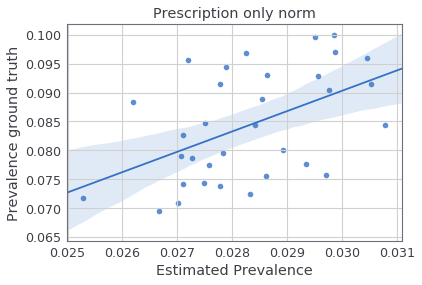

In [78]:
sns.regplot(x=[prevalenceDict[k]['presc'] for k in prevalenceDict ] , y = [gt_dict[k] for k in prevalenceDict ] )
ax = plt.gca()
ax.set_title("Prescription only norm")
ax.set_xlabel("Estimated Prevalence")
ax.set_ylabel("Prevalence ground truth")

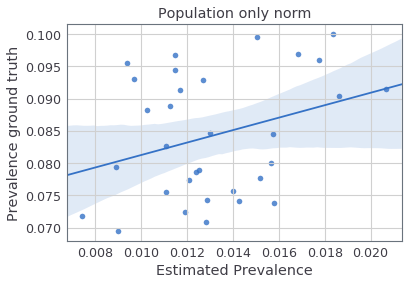

In [92]:
sns.regplot(x=[prevalenceDict[k]['pop'] for k in prevalenceDict if k != 'City of London' ] , y = [gt_dict[k] for k in prevalenceDict if k != 'City of London' ] )
ax = plt.gca()
ax.set_title("Population only norm")
ax.set_xlabel("Estimated Prevalence")
ax.set_ylabel("Prevalence ground truth")

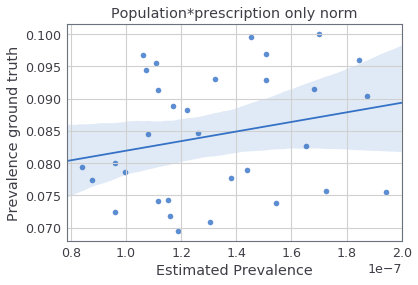

In [91]:
sns.regplot(x=[prevalenceDict[k]['norm'] for k in prevalenceDict if k != 'City of London' ] , y = [gt_dict[k] for k in prevalenceDict  if k != 'City of London'] )
ax = plt.gca()
ax.set_title("Population*prescription only norm")
ax.set_xlabel("Estimated Prevalence")
ax.set_ylabel("Prevalence ground truth")

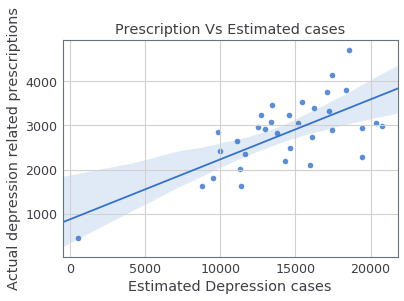

In [81]:
sns.regplot(x=[cases2006[k] for k in depression_prescriptionCount_london] , y = [depression_prescriptionCount_london[k]for k in depression_prescriptionCount_london] )
ax = plt.gca()
ax.set_title("Prescription Vs Estimated cases")
ax.set_xlabel("Estimated Depression cases")
ax.set_ylabel("Actual depression related prescriptions")

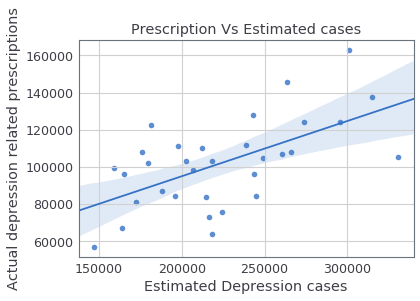

In [93]:
sns.regplot(x=[population_dict[k] for k in all_prescription_counts if k != 'City of London'] , y = [all_prescription_counts[k]for k in all_prescription_counts if k != 'City of London' ] )
ax = plt.gca()
ax.set_title("Prescription Vs Estimated cases")
ax.set_xlabel("Estimated Depression cases")
ax.set_ylabel("Actual depression related prescriptions")

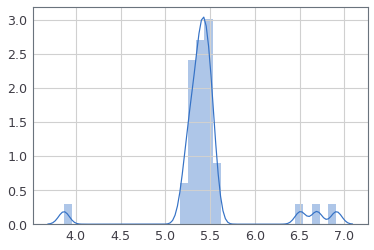

In [47]:
sns.distplot([np.log10(population_dict[k]) for k in population_dict])

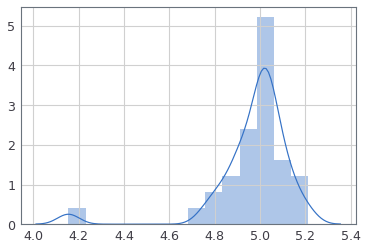

In [49]:
sns.distplot([np.log10(all_prescription_counts[k]) for k in all_prescription_counts])